In [29]:
from neo4j_runway import Discovery, GraphDataModeler, PyIngest, UserInput
from neo4j_runway.code_generation import PyIngestConfigGenerator
from neo4j_runway.llm.openai import OpenAIDiscoveryLLM, OpenAIDataModelingLLM

In [30]:
from dotenv import load_dotenv
import os

In [31]:
load_dotenv(dotenv_path='dot.env')
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
NEO4J_URL = os.getenv("NEO4J_URL")
NEO4J_USERNAME = os.getenv("NEO4J_USERNAME")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")
NEO4J_DATABASE = os.getenv("NEO4J_DATABASE")

In [32]:
from neo4j_runway.utils.data import load_local_files

data_directory = ""

data_dictionary = { 'Name': 'name of shoe.',
                    'Brand': 'brand of shoe.',
                    'IsCarbonPlated':'tells you whether a shoe has a carbon plate.',
                    'Offset': 'the difference of the stack height of heel and forefoot. also known as heel to toe drop.',
                    'Stack Height':'the height of the heel and the height of the forefoot that is given.',
                    'Cushioning': 'the level of the cushioning of the shoe.',
                    'Foam Cushioning': 'the name of type of foam cushioning used for the shoe.',
                    'Notes_Shoe': 'notes about the shoe.'
                    }

use_cases = ["Which shoe has an offset lower than 8mm?", "Which shoes have PWRRUN PB foam cushioning?", "Which shoe have a carbon plate in other features?"]

data = load_local_files(data_directory=data_directory,
                        data_dictionary=data_dictionary,
                        general_description="This is data about shoes and their attributes.",
                        use_cases=use_cases,
                        include_files=["shoes.csv"])

In [33]:
llm_disc = OpenAIDiscoveryLLM(model_name='gpt-4o-mini-2024-07-18', model_params={"temperature": 0})
llm_dm = OpenAIDataModelingLLM(model_name='gpt-4o-2024-05-13', model_params={"temperature": 0.5})

In [34]:
disc = Discovery(llm=llm_disc, data=data)
disc.run()

disc.run(show_result=True, notebook=True)

### Preliminary Analysis of Shoe Data

#### Overall Data Characteristics:
1. **Data Size**: The dataset contains 36 entries (shoes) and 8 features (columns).
2. **Data Types**: The features consist of a mix of categorical (object) and boolean data types. The majority of the features are categorical, which is common in product attribute datasets.
3. **Missing Values**: There are several features with missing values:
   - **Stack Height**: 26 missing values (only 10 non-null).
   - **Cushioning**: 5 missing values (31 non-null).
   - **Foam Cushioning**: 7 missing values (29 non-null).
   - **Notes_Shoe**: 31 missing values (5 non-null).

#### Feature Analysis:
1. **Name**: Unique identifiers for each shoe, which is essential for distinguishing between different products.
2. **Brand**: There are 7 unique brands, with Saucony being the most frequent (6 occurrences). This feature can help in brand-specific analysis.
3. **IsCarbonPlated**: A boolean feature indicating whether the shoe has a carbon plate. This is crucial for performance-related queries.
4. **Offset**: The most common offset is 8mm, with 11 occurrences. This feature is important for understanding shoe drop preferences.
5. **Stack Height**: This feature has significant missing data, which may limit its usefulness in analysis. The most common stack height is 39.5mm/31.5mm.
6. **Cushioning**: The most common cushioning level is "Max" (6 occurrences). This feature is important for understanding the comfort level of the shoes.
7. **Foam Cushioning**: The most common foam type is "Helion" (3 occurrences). This feature can be important for material-specific queries.
8. **Notes_Shoe**: This feature has limited data and may not be very useful due to the high number of missing values.

#### Important Features for Use Cases:
- **Offset**: To identify shoes with an offset lower than 8mm, this feature is critical.
- **Foam Cushioning**: To find shoes with PWRRUN PB foam cushioning, this feature is essential.
- **IsCarbonPlated**: To determine which shoes have a carbon plate, this boolean feature is key, along with other features that may provide context (like brand or cushioning).

### Summary:
The dataset provides a good overview of various shoe attributes, but the high number of missing values in certain features (especially Stack Height and Notes_Shoe) may limit the depth of analysis. The most important features for the specified use cases are Offset, Foam Cushioning, and IsCarbonPlated. Addressing the missing values could enhance the dataset's usability for more comprehensive insights.

### Preliminary Analysis of Shoe Data

#### Overall Data Characteristics:
1. **Data Size**: The dataset contains 36 entries (shoes) and 8 features (columns).
2. **Data Types**: The features consist of a mix of categorical (object) and boolean data types. The majority of the features are categorical, which is common in product attribute datasets.
3. **Missing Values**: There are several features with missing values:
   - **Stack Height**: 26 missing values (only 10 non-null).
   - **Cushioning**: 5 missing values (31 non-null).
   - **Foam Cushioning**: 7 missing values (29 non-null).
   - **Notes_Shoe**: 31 missing values (5 non-null).

#### Feature Analysis:
1. **Name**: Unique identifiers for each shoe, which is essential for distinguishing between different products.
2. **Brand**: There are 7 unique brands, with Saucony being the most frequent (6 occurrences). This feature can help in brand-specific analysis.
3. **IsCarbonPlated**: A boolean feature indicating whether the shoe has a carbon plate. This is crucial for performance-related queries.
4. **Offset**: This feature has 9 unique values, with 8mm being the most common (11 occurrences). It is important for understanding shoe drop preferences.
5. **Stack Height**: This feature has significant missing data, which may limit its usefulness. The most common value is 39.5mm/31.5mm.
6. **Cushioning**: With 14 unique values and a top frequency of 'Max', this feature is important for understanding the comfort level of the shoes.
7. **Foam Cushioning**: This feature has 16 unique types, with 'Helion' being the most common. It is important for material-specific queries.
8. **Notes_Shoe**: This feature has limited data and may not be very useful due to the high number of missing values.

#### Important Features for Use Cases:
- **Offset**: To identify shoes with an offset lower than 8mm.
- **Foam Cushioning**: To find shoes with PWRRUN PB foam cushioning.
- **IsCarbonPlated**: To determine which shoes have a carbon plate, along with other features.

### Summary:
The dataset provides a good overview of various shoe attributes, but the high number of missing values in certain features (especially Stack Height and Notes_Shoe) may limit the analysis. The most important features for the specified use cases are Offset, Foam Cushioning, and IsCarbonPlated, as they directly relate to the queries of interest. Further analysis could focus on shoes with specific attributes, especially those that are popular or frequently mentioned.

In [38]:
gdm = GraphDataModeler(llm=llm_dm, discovery=disc)

In [39]:
gdm.create_initial_model()

> Generating Nodes...
Attempts | 3  
Received Valid Nodes
Nodes
* (:Shoe)   * (:Brand) 

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)   * (:Brand) 

Relationships
* (:Shoe)-[:HAS_BRAND]->(:Brand)   


DataModel(nodes=[Node(label='Shoe', properties=[Property(name='name', type='str', column_mapping='Name', alias=None, is_unique=True, part_of_key=False), Property(name='isCarbonPlated', type='bool', column_mapping='IsCarbonPlated', alias=None, is_unique=False, part_of_key=False), Property(name='offset', type='str', column_mapping='Offset', alias=None, is_unique=False, part_of_key=False), Property(name='stackHeight', type='str', column_mapping='Stack Height', alias=None, is_unique=False, part_of_key=False), Property(name='cushioning', type='str', column_mapping='Cushioning', alias=None, is_unique=False, part_of_key=False), Property(name='foamCushioning', type='str', column_mapping='Foam Cushioning', alias=None, is_unique=False, part_of_key=False), Property(name='notesShoe', type='str', column_mapping='Notes_Shoe', alias=None, is_unique=False, part_of_key=False)], source_name='file'), Node(label='Brand', properties=[Property(name='brandName', type='str', column_mapping='Brand', alias='Bra

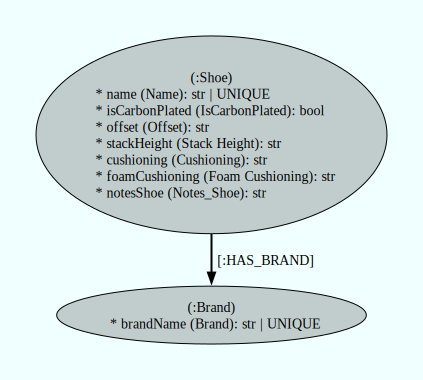

In [40]:
gdm.current_model.visualize()

### Now that we have generated a model, we can make changes to the model ###

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)         * (:Brand)
* (:Cushioning)    

Relationships
* (:Shoe)-[:HAS_BRAND]->(:Brand)             
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)   


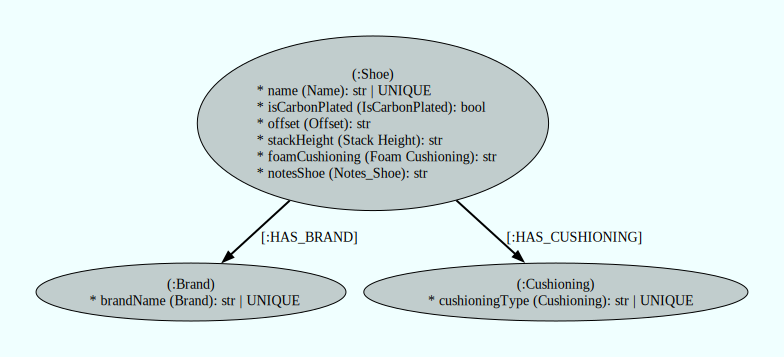

In [41]:
gdm.iterate_model(corrections="Create a Cushioning node with Cushioning property.")
gdm.current_model.visualize()

> Generating Data Model...
Attempts | 1  
Received Valid Data Model
Nodes
* (:Shoe)         * (:Brand)
* (:Cushioning)   * (:Offset) 

Relationships
* (:Shoe)-[:HAS_BRAND]->(:Brand)             
* (:Shoe)-[:HAS_CUSHIONING]->(:Cushioning)   
* (:Shoe)-[:HAS_OFFSET]->(:Offset)           


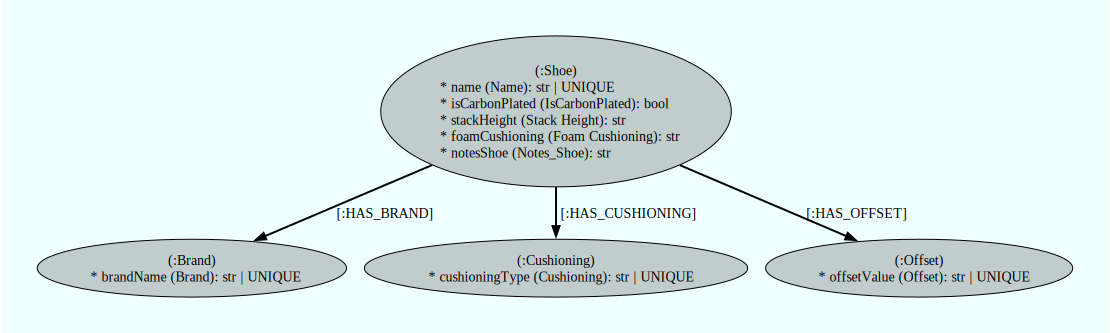

In [42]:
gdm.iterate_model(corrections="Create an Offset node with offset property.")
gdm.current_model.visualize()

In [43]:
gen = PyIngestConfigGenerator(data_model=gdm.current_model,
                         username=os.environ.get("NEO4J_USERNAME"),
                         password=os.environ.get("NEO4J_PASSWORD"),
                         uri=os.environ.get("NEO4J_URL"),
                         database=os.environ.get("NEO4J_DATABASE"),
                         file_directory=data_directory, source_name="shoes.csv")

pyingest_yaml = gen.generate_config_string()


In [44]:
gen.generate_config_yaml(file_name="shoes.yaml")

In [46]:
PyIngest(config=pyingest_yaml, verbose=False)